In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13694597791173671512
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14043581520905063574
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.9))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.9))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 18s 10ms/step - loss: 5.0365 - accuracy: 0.0116 - val_loss: 4.5416 - val_accuracy: 0.0263
Epoch 2/90
1563/1563 [==============================] - 14s 9ms/step - loss: 4.9313 - accuracy: 0.0132 - val_loss: 4.4984 - val_accuracy: 0.0351
Epoch 3/90
1563/1563 [==============================] - 13s 9ms/step - loss: 4.8479 - accuracy: 0.0149 - val_loss: 4.4666 - val_accuracy: 0.0463
Epoch 4/90
1563/1563 [==============================] - 14s 9ms/step - loss: 4.7640 - accuracy: 0.0166 - val_loss: 4.4248 - val_accuracy: 0.0491
Epoch 5/90
1563/1563 [==============================] - 15s 9ms/step - loss: 4.6986 - accuracy: 0.0180 - val_loss: 4.4047 - val_accuracy: 0.0541
Epoch 6/90
1563/1563 [==============================] - 14s 9ms/step - loss: 4.6356 - accuracy: 0.0210 - val_loss: 4.4119 - val_accuracy: 0.0567
Epoch 7/90
1563/1563 [==============================] - 15s 10ms/step - loss: 4.5951 - accuracy: 0.0220 - val_loss: 4.3548 - val_

1563/1563 [==============================] - 13s 8ms/step - loss: 3.5814 - accuracy: 0.1222 - val_loss: 3.6009 - val_accuracy: 0.1670
Epoch 58/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.5653 - accuracy: 0.1218 - val_loss: 3.6968 - val_accuracy: 0.1623
Epoch 59/90
1563/1563 [==============================] - 13s 9ms/step - loss: 3.5450 - accuracy: 0.1263 - val_loss: 3.6525 - val_accuracy: 0.1634
Epoch 60/90
1563/1563 [==============================] - 14s 9ms/step - loss: 3.5283 - accuracy: 0.1301 - val_loss: 3.7223 - val_accuracy: 0.1502
Epoch 61/90
1563/1563 [==============================] - 14s 9ms/step - loss: 3.5091 - accuracy: 0.1327 - val_loss: 3.6028 - val_accuracy: 0.1758
Epoch 62/90
1563/1563 [==============================] - 14s 9ms/step - loss: 3.4895 - accuracy: 0.1370 - val_loss: 3.5831 - val_accuracy: 0.1764
Epoch 63/90
1563/1563 [==============================] - 13s 8ms/step - loss: 3.4739 - accuracy: 0.1361 - val_loss: 3.6455 - val_accurac

In [5]:
#cifar100, dropout 0.9

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 3.3496 - accuracy: 0.2128
Test loss: 3.3496437072753906
Test accuracy: 0.21279999613761902


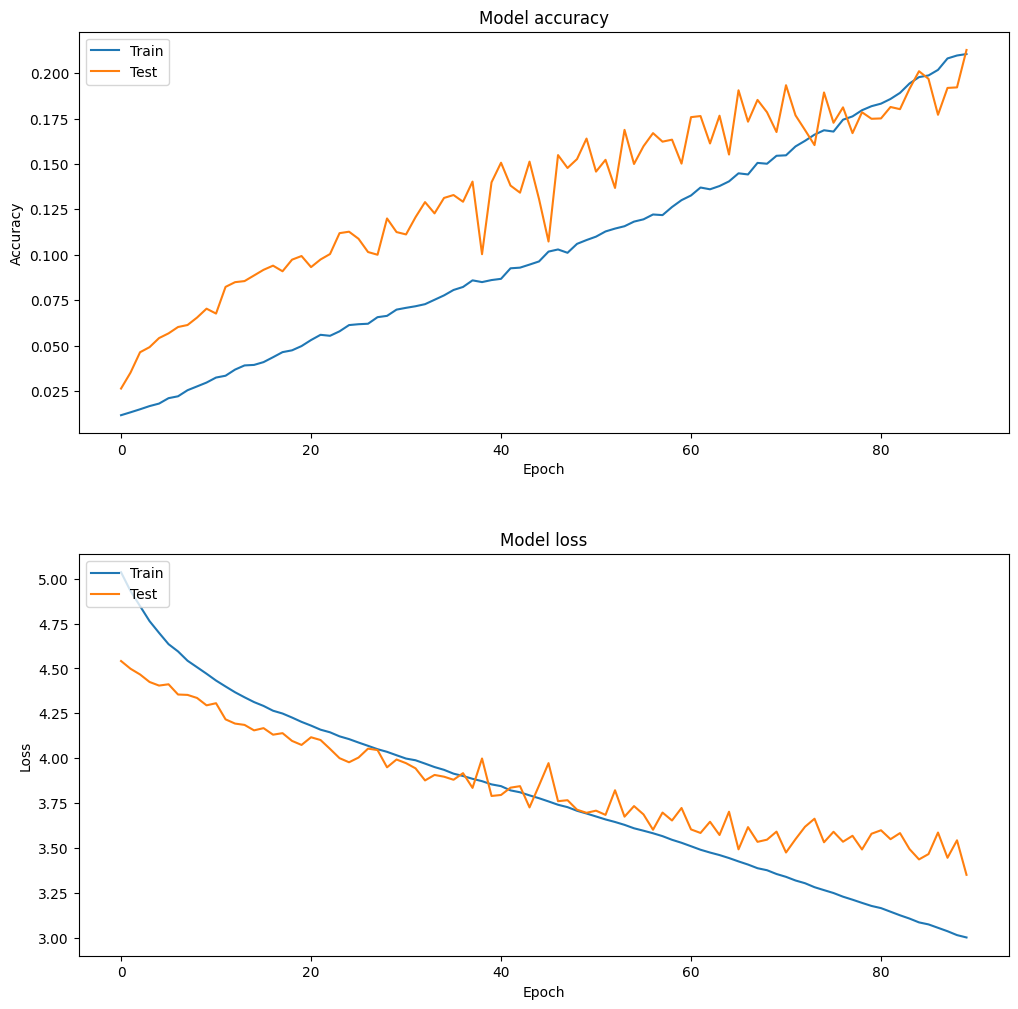

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
